In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras import utils
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

%matplotlib inline 
plt.style.use('fivethirtyeight')

## Ended up not using this due to poor model performance 

### Read in Data

In [2]:
df = pd.read_csv('data/clean_df.csv')

In [3]:
df.head()

,date,incident_id,governorate,district,area,target,main_category,sub_category,min_air_raids,max_air_raids,civilian_casualties,fatalities,woman_fatalities,child_fatalities,injured,woman_injured,child_injured,confirmed_time,time_of_day
0,2015-03-26,1,Sanaa,bani al-harith,Al-Rahabah,Al-Daylami Airbase,military_security_target,military site,1,2.0,0,0,0,0,0,0,0.0,2,morning
1,2015-03-26,2,Sanaa,bani al-harith,Airport,Sana'a International Airport,infrastructure,transport,1,2.0,0,0,0,0,0,0,0.0,2,morning
2,2015-03-26,3,Sanaa,bani al-harith,Al-Sonblah Neighbourhood,Residential Area,civilian,residential area,1,2.0,29,21,3,14,8,0,7.0,2,morning
3,2015-03-26,4,Sanaa,al-sab'ein,Al-Nahdain,Presidential Palace,military_security_target,military site,1,2.0,0,0,0,0,0,0,0.0,3,morning
4,2015-03-26,5,Sanaa,al-thawrah,Al-Nahdhah,Former 1st Armoured Division,military_security_target,military site,1,2.0,0,0,0,0,0,0,0.0,3,morning


## Resetting index to datetime index

In [4]:
df.set_index('date', inplace=True)
df.index = pd.to_datetime(df.index)

In [5]:
df = pd.get_dummies(df, columns=['main_category', 'sub_category', 'time_of_day', 'confirmed_time'])

## Creating numerical category column "label" for values in governorate column

In [6]:
len(df['governorate'].unique())

22

In [7]:
df['label'] = pd.Categorical(df['governorate'])

In [8]:
df['label'] = df['label'].cat.codes

In [9]:
df['label']

date
2015-03-26    18
2015-03-26    18
2015-03-26    18
2015-03-26    18
2015-03-26    18
              ..
2020-12-31    18
2020-12-31    18
2020-12-31    18
2020-12-31    18
2020-12-31    14
Name: label, Length: 22485, dtype: int8

## Setting up/scaling training/testing data 

In [10]:
X = df.drop(columns=['area', 'target', 'governorate', 'district', 'label'])
y = df['label']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=6, shuffle=False)

In [12]:
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

## Converting y to one hot encoded columns for classes

In [13]:
y_train = to_categorical(y_train, num_classes=22) 
y_test = to_categorical(y_test, num_classes=22)

## Setting up the model to predict governorate

In [14]:
input_shape = X_train_ss[0].shape

In [15]:
model = Sequential()

model.add(Dense(256, input_shape=input_shape, activation="relu"))

model.add(Dense(128, activation="relu"))

model.add(Dense(64, activation="relu"))

model.add(Dense(64, activation="relu"))

model.add(Dense(32, activation='relu'))

model.add(Dense(22, activation='softmax')) # Using softmax for multiclass output predictions

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc']) 
# multiclass output = categorical crossentropy for loss function
history = model.fit(X_train_ss, y_train, validation_data=(X_test_ss, y_test), epochs=100, batch_size = 512)

Epoch 1/100
33/33 [==============================] - 2s 32ms/step - loss: 2.8146 - acc: 0.1723 - val_loss: 2.3565 - val_acc: 0.2930
Epoch 2/100
33/33 [==============================] - 0s 6ms/step - loss: 2.1903 - acc: 0.3182 - val_loss: 2.2894 - val_acc: 0.2981
Epoch 3/100
33/33 [==============================] - 0s 6ms/step - loss: 2.0843 - acc: 0.3391 - val_loss: 2.3302 - val_acc: 0.2992
Epoch 4/100
33/33 [==============================] - 0s 6ms/step - loss: 2.0211 - acc: 0.3569 - val_loss: 2.3667 - val_acc: 0.3042
Epoch 5/100
33/33 [==============================] - 0s 6ms/step - loss: 1.9964 - acc: 0.3605 - val_loss: 2.4158 - val_acc: 0.3001
Epoch 6/100
33/33 [==============================] - 0s 7ms/step - loss: 1.9548 - acc: 0.3736 - val_loss: 2.4045 - val_acc: 0.2832
Epoch 7/100
33/33 [==============================] - 0s 6ms/step - loss: 1.9467 - acc: 0.3743 - val_loss: 2.4091 - val_acc: 0.2882
Epoch 8/100
33/33 [==============================] - 0s 6ms/step - loss: 1.9272 - 

33/33 [==============================] - 0s 7ms/step - loss: 1.5127 - acc: 0.4861 - val_loss: 3.1413 - val_acc: 0.2759
Epoch 64/100
33/33 [==============================] - 0s 6ms/step - loss: 1.5218 - acc: 0.4808 - val_loss: 3.0510 - val_acc: 0.2736
Epoch 65/100
33/33 [==============================] - 0s 6ms/step - loss: 1.5249 - acc: 0.4871 - val_loss: 3.2133 - val_acc: 0.2757
Epoch 66/100
33/33 [==============================] - 0s 6ms/step - loss: 1.5055 - acc: 0.4938 - val_loss: 3.1468 - val_acc: 0.2789
Epoch 67/100
33/33 [==============================] - 0s 6ms/step - loss: 1.4939 - acc: 0.4919 - val_loss: 3.0871 - val_acc: 0.2672
Epoch 68/100
33/33 [==============================] - 0s 6ms/step - loss: 1.4884 - acc: 0.5020 - val_loss: 3.1163 - val_acc: 0.2718
Epoch 69/100
33/33 [==============================] - 0s 6ms/step - loss: 1.4915 - acc: 0.4921 - val_loss: 3.2793 - val_acc: 0.2761
Epoch 70/100
33/33 [==============================] - 0s 7ms/step - loss: 1.4850 - acc: 0

## Plotting Loss and accuracy

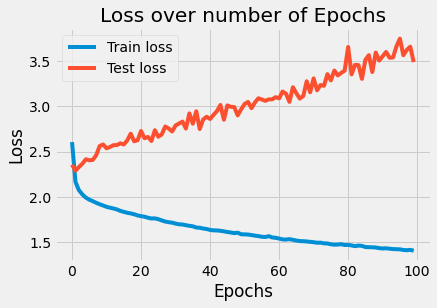

In [19]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over number of Epochs')
plt.legend();

### Very poor performance of ~ 3.6-3.8 for testing data, could not manipulate to get a decent result. Won't be using this in presentation 

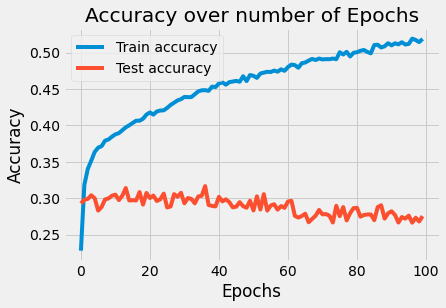

In [18]:
plt.plot(history.history['acc'], label='Train accuracy')
plt.plot(history.history['val_acc'], label='Test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy over number of Epochs')
plt.legend();

### Very poor performance of ~.30 for testing data, could not manipulate to get a decent result. Won't be using this in presentation 

## Ended up not using this due to poor model performance 